# Kaffeemischung {#sec-graphical-coffee}

Open in Colab [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/opt2025-de/blob/main/02-Graphical-Method/02-Blending.ipynb)

Als Beispiel werden wir ein kleines Café beraten. Das Café hat zwei Kaffeesorten: Espresso Super und Espresso Deluxe. Die Kaffeesorten bestehen aus Arabica und Robusta Bohnen. Super ist eine Mischung aus gleichen Teilen Arabica und Robusta, während in Deluxe 75% Robusta und 25% Arabica enthalten sind. Die Lieferanten des Cafés haben die folgenden Einschränkungen: 120 kg Arabica pro Woche und 160 kg Robusta pro Woche. Die Nachfrage nach Super ist unbegrenzt, aber die Nachfrage nach Deluxe ist auf 150 kg pro Woche begrenzt. Der Gewinn ist 40 €/kg für Super und 50 €/kg für Deluxe. Wie viel von jedem Espresso sollte das Café produzieren, um den Gewinn zu maximieren?

$$
\begin{align*}
& x_1: \text{ Espresso Super (kg)}\\
& x_2: \text{ Espresso Delux (kg)}
\end{align*}
$$

:::{.callout-note collapse="true"}
## Das mathematische Modell

$$
\max z = 40 x_1 + 50 x_2 \text{(Zielfunktion)}
$$

$$
\begin{align}
0.5 x_1 + 0.25 x_2 & \leq 120 \text{ (Arabica)}\\
0.5 x_1 + 0.75 x_2 & \leq 160 \text{ (Robusta)} \\
0 \cdot x_1 + x_2 & \leq 150 \text{ (Nachfrage Deluxe)}\\
x_1 & \geq 0 \\
x_2 & \geq 0
\end{align}
$$

:::


## Lösung mit gurobi

In [1]:
%pip install gurobipy

import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("Kaffeemischung")

x1 = m.addVar(vtype=GRB.CONTINUOUS, name="Super")
x2 = m.addVar(vtype=GRB.CONTINUOUS, name="Deluxe")

# Set objective (Zielfunktion)

m.setObjective(40 * x1 + 50 * x2, GRB.MAXIMIZE)

# Add constraints (Einschränkungen)

m.addConstr(0.5 * x1 + 0.25 * x2 <= 120, "Arabica")
m.addConstr(0.5 * x1 + 0.75 * x2 <= 160, "Robusta")
m.addConstr(x2 <= 150, "Nachfrage Deluxe")

# Optimize model (Optimiere das Modell)

m.optimize()

# Ausgabe des Ergebnisses

print(f"Der höchstmögliche Gewinn ist {m.objVal} EUR")

m.display()
m.write("Kaffeemischung.lp")

Note: you may need to restart the kernel to use updated packages.
Restricted license - for non-production use only - expires 2026-11-23


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.2 LTS")


CPU model: Intel(R) Core(TM) i9-14900K, instruction set [SSE2|AVX|AVX2]


Thread count: 32 physical cores, 32 logical processors, using up to 32 threads


Optimize a model with 3 rows, 2 columns and 5 nonzeros


Model fingerprint: 0xb45dd709


Coefficient statistics:


  Matrix range     [2e-01, 1e+00]


  Objective range  [4e+01, 5e+01]


  Bounds range     [0e+00, 0e+00]


  RHS range        [1e+02, 2e+02]


Presolve removed 1 rows and 0 columns


Presolve time: 0.00s


Presolved: 2 rows, 2 columns, 4 nonzeros


Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0    2.4000000e+04   1.325000e+02   0.000000e+00      0s


       2    1.2000000e+04   0.000000e+00   0.000000e+00      0s


Solved in 2 iterations and 0.00 seconds (0.00 work units)


Optimal objective  1.200000000e+04


Der höchstmögliche Gewinn ist 12000.0 EUR
Maximize


  40.0 Super + 50.0 Deluxe


Subject To


  Arabica: 0.5 Super + 0.25 Deluxe <= 120


  Robusta: 0.5 Super + 0.75 Deluxe <= 160


  Nachfrage Deluxe: Deluxe <= 150


/tmp/ipykernel_154583/1176123504.py:30: DeprecationWarning:

Model.display() is deprecated



In [2]:
# Read a text file and print it

with open("Kaffeemischung.lp", "r") as file:
    lp_file = file.read()

print(lp_file)

\ Model Kaffeemischung
\ LP format - for model browsing. Use MPS format to capture full model detail.
Maximize
  40 Super + 50 Deluxe
Subject To
 Arabica: 0.5 Super + 0.25 Deluxe <= 120
 Robusta: 0.5 Super + 0.75 Deluxe <= 160
 Nachfrage_Deluxe: Deluxe <= 150
Bounds
End




## Zulässige Menge

Der erste Schritt ist die (grafische) Bestimmung der zulässigen Menge. Dazu zeichnen wir die Geraden zu den Ungleichungen bilden.

$$
\begin{align}
0.5 x_1 + 0.25 x_2  & = 120 \\
0.5 x_1 + 0.75 x_2  & = 160 \\
0 \cdot x_1 + x_2   & = 150 \\
x_1  & = 0 \\
x_2  & = 0
\end{align}
$${#eq-coffe-restr}

Wir zeichnen all die Geraden, die zu den Gleichungen gehören. Wenn man das per Hand macht, ist es am leichtesten
die Schnittpunkte jeder Gerade mit den Koordinatenachsen zu bestimmen. 

1. $0.5 x_1 + 0.25 x_2 = 120$. 
 Die Gerade schneidet die $x_1$-Achse bei $x_1 = 120 / 0.5 = 240$ und die $x_2$-Achse bei $x_2 = 120 / 0.25 = 480$.

2. $0.5 x_1 + 0.75 x_2 = 160$.
    Die Gerade schneidet die $x_1$-Achse bei $x_1 = 160 / 0.5 = 320$ und die $x_2$-Achse bei $x_2 = 160 / 0.75 = 213.33$.
3. $x_2 = 150$.
    Die Gerade schneidet die $x_2$-Achse bei $x_2 = 150$ und ist parallel zur $x_1$-Achse.
4. $x_1 = 0$.
    Diese Gerade stimmt mit der $x_2$-Achse überein.
5. $x_2 = 0$.
    Diese Gerade stimmt mit der $x_1$-Achse überein.
    
Die Geraden sind in @fig-coffее-restr dargestellt.

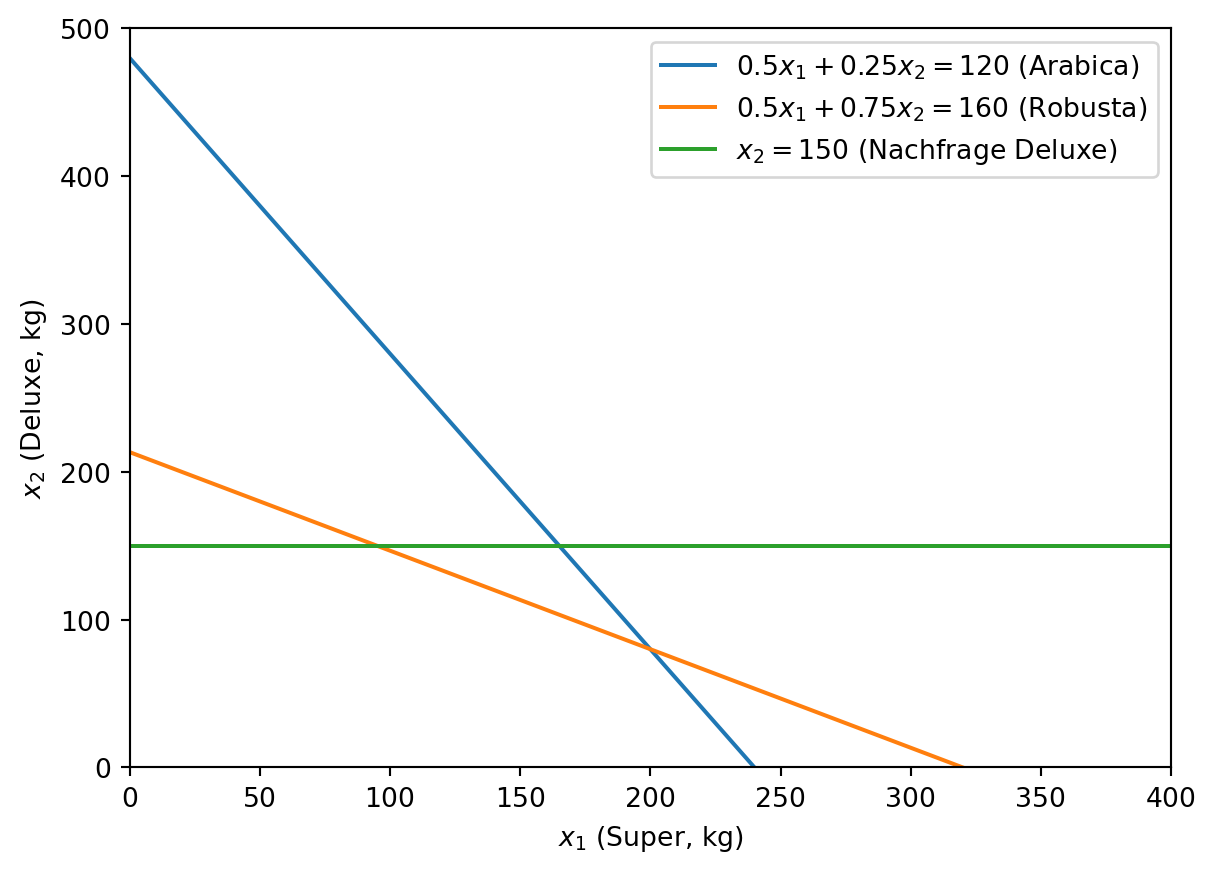

In [3]:
#| label: fig-coffее-restr
#| fig-cap: "Die Geraden der drei Restriktionen des Kaffeeproblems"
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

fig, ax = plt.subplots()

ax.plot([0, 240], [480, 0], label=r"$0.5 x_1 + 0.25 x_2 = 120$ (Arabica)")
ax.plot([0, 320], [213.33, 0], label=r"$0.5 x_1 + 0.75 x_2 = 160$ (Robusta)")
ax.plot([0, 400], [150, 150], label=r"$x_2 = 150$ (Nachfrage Deluxe)")

ax.set_xlim((0, 400))
ax.set_ylim((0, 500))
ax.set_xlabel(r'$x_1$ (Super, kg)')
ax.set_ylabel(r'$x_2$ (Deluxe, kg)')
ax.legend(loc=0)



Die zulässige Menge ist durch die Schnittpunkte der Geraden definiert. In @fig-coffее-restr ist das Polygon definiert durch

1. Der Schnittpunkt der beiden Nichtnegativitätsbedingungen: (0, 0)
2. Der Schnittpunkt der Nichtnegativitätsbedingung von Super (der $x_1$-Achse) und Arabica: (240, 0).
3. Der Schnittpunkt der Geraden zu Arabica und Robusta: (200, 80).
4. Der Schnittpunkt der Geraden zu Robusta und Nachfrage Deluxe: (95, 150).
5. Der Schnittpunkt der Geraden zu Nachfrage Deluxe und der Nichtnegativitätsbedingung von Deluxe (der $x_1$-Achse): (0, 150).

Um die Koordinaten des Schnittpunkts der Geraden zu "Super" und "Deluxe" zu finden, müssen wir das System der beiden Gleichungen lösen

$$
\begin{align}
0.5 x_1 + 0.25 x_2 & = 120 \text{ (1: арабика)} \\
0.5 x_1 + 0.75 x_2 & = 160 \text{ (2: робуста)}
\end{align}
$$

Zum Beispiel können wir die erste Gleichung von der zweiten subtrahieren, um $x_1$ zu eliminieren:

$$
\begin{align}
(0.75 - 0.25) x_2 & = 160 - 120 \\
0.5 x_2 & = 40 \\
x_2 & = 80
\end{align}
$$

Einsetzen mit $x_2 = 80$ in die erste Gleichung ergibt

$$
\begin{align}
0.5 x_1 + 0.25 \cdot 80 & = 120\\
x_1 & = 200.
\end{align}
$$

Am Ende erhalten wir (200, 80) als Lösung des Gleichungssystems und daher die Koordinaten des Schnittpunkts der Geraden zu "Super" und "Deluxe".

Um den Schnittpunkt der Geraden zu "Robusta" und "Nachfrage Deluxe" zu finden, müssen wir das System der beiden Gleichungen lösen

$$
\begin{align}
0.5x_1 + 0.75 x_2 & = & 160 \text{ робуста}\\
0 x_1 + x_2 & = & 150 \text{ търсене на Делукс}
\end{align}
$$

Als Lösung erhalten wir (95, 150).

Auf diese Art und weise haben wir alle Eckpunkte der zulässigen Menge bestimmt: (0, 0), (240, 0), (200, 80), (95, 150), (0, 150) ([@fig-coffee-feasible-set]).


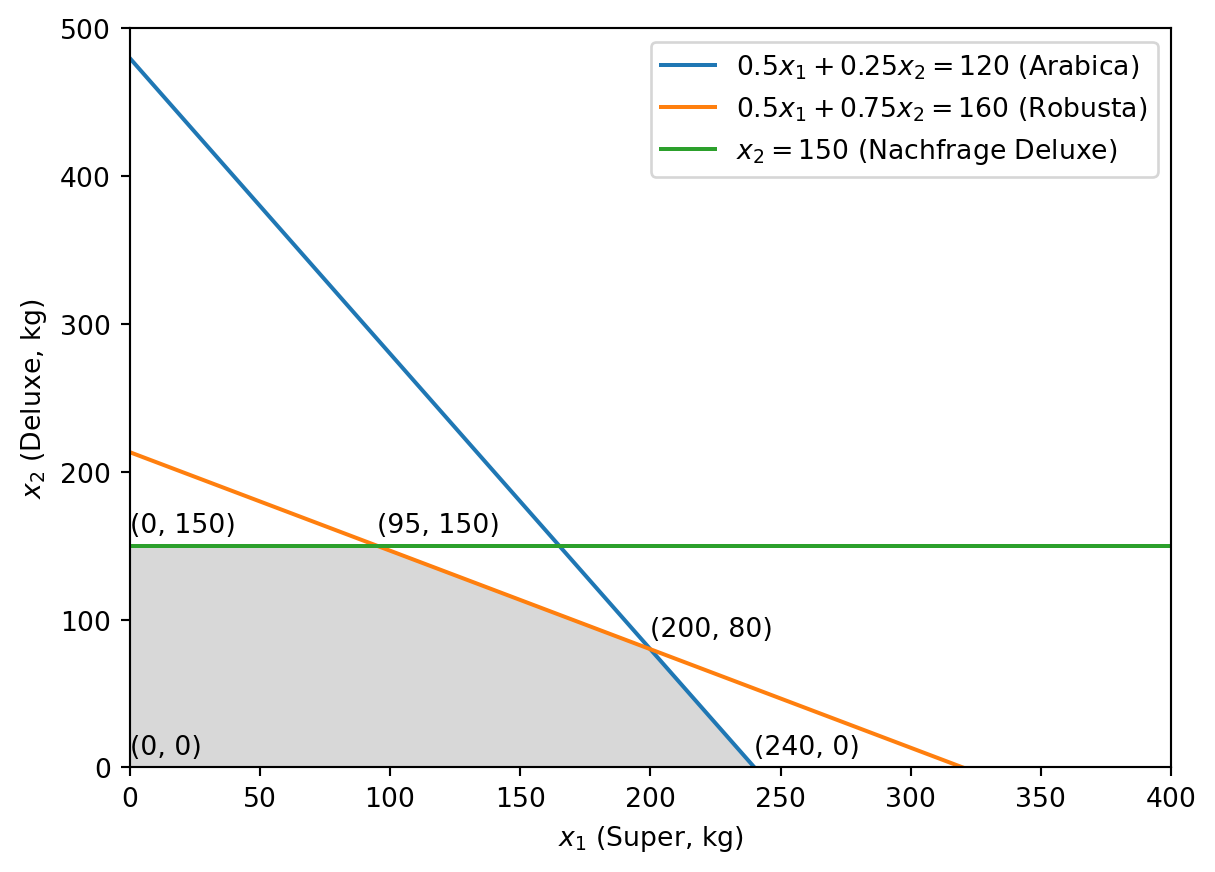

In [4]:
#| label: fig-coffee-feasible-set
#| fig-cap: "Zulässige Menge für die Kaffeeproduktion"
#| code-fold: true

vertices = [
    [0, 0],
    [0, 150],
    [95, 150],
    [200, 80],    
    [240, 0]
]

vertices_x = [v[0] for v in vertices]
vertices_y = [v[1] for v in vertices]

for v in vertices:
    ax.annotate(
        f"({v[0]}, {v[1]})",
        (v[0], v[1]),
        textcoords="offset points",
        xytext=(0, 5)
    )

ax.fill(vertices_x, vertices_y, color='grey', alpha=0.3)

display(fig)

## Die Zielfunktion

Um den optimalen Plan zu bestimmen, werden wir die Zielfunktion in die Grafik einzeichnen. Die Zielfunktion $z(x_1, x_2) = 40 x_1 + 50 x_2$ ist in @fig-coffee-objective dargestellt. Die Zielfunktion ist eine Ebene im dreidimensionalen Raum.

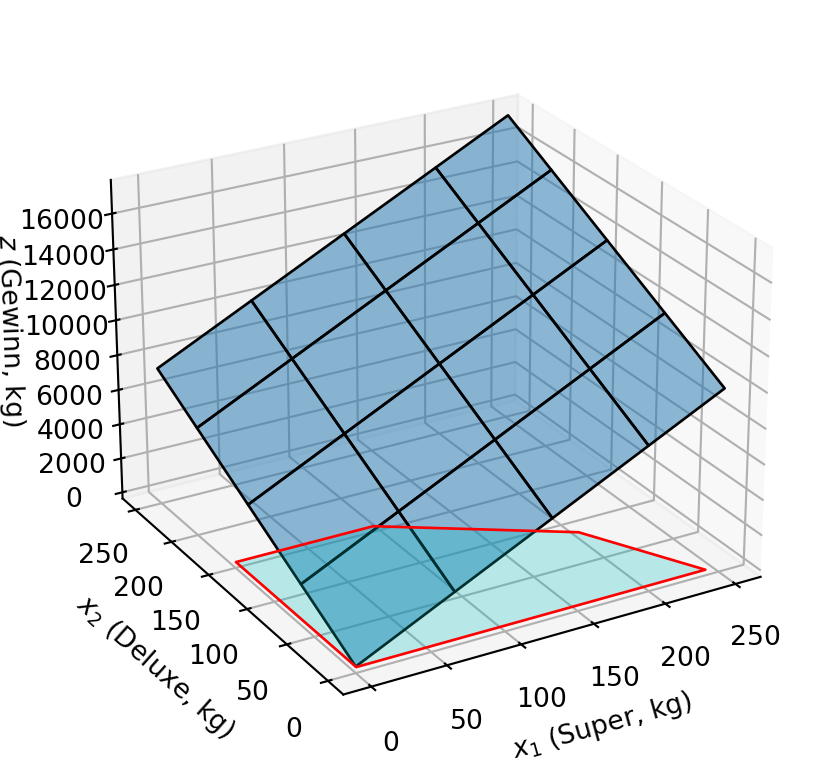

In [5]:
#| label: fig-coffee-objective
#| fig-cap: "Die Zielfunktion des Kaffeeproblems"
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create the x, y, and z coordinate arrays
x, y = np.meshgrid(np.linspace(0, 250, 20), np.linspace(0, 250, 20))
z = 40 * x + 30 * y

# Create a figure
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Add a 3D subplot
ax.plot_surface(x, y, z, rstride=5, cstride=5, edgecolor='k', alpha=0.5)
ax.view_init(elev=25, azim=-120)
ax.set_xlabel(r"$x_1$ (Super, kg)")
ax.set_ylabel(r"$x_2$ (Deluxe, kg)")
ax.set_zlabel(r"$z$ (Gewinn, kg)")

vertices_3d = [v + [0] for v in vertices]

# Create a Poly3DCollection
poly = Poly3DCollection([vertices_3d], alpha=.25, linewidths=1, edgecolors='r', facecolors='c')

# Add the Poly3DCollection to the axes
ax.add_collection3d(poly)

Diese Visualisierung ist hilfreich, um zu verstehen, wie die Zielfunktion aussieht, aber sie hilft uns nicht, das Maximum innerhalb der zulässigen Menge zu finden. Daher werden wir die Projektion der Zielfunktion auf die Ebene der zulässigen Menge verwenden.

Fixieren wir ein paar (beliebige) Niveaus des Gewinns und zeichnen wir die Geraden, die sie repräsentieren. Nehmen wir an, dass diese Niveaus 5000, 10000 und 12000 sind. Um diese Geraden zu zeichnen, müssen wir die Schnittpunkte dieser Geraden mit den beiden Achsen finden.

Alle Kombinationen von Super und Deluxe, die genau 5000 Gewinn erzielen, liegen auf einer Geraden, die durch die Gleichung

$$
40x_1 + 50x_2 = 5000
$$

gegeben sind.

Alle Kombinationen von Super und Deluxe, die genau 10000 Gewinn erzielen, liegen auf einer Geraden, die durch die Gleichung

$$
40x_1 + 50x_2 = 10000
$$

gegeben sind.

Beide Geraden verlaufen parallel zueinander, da der Anstieg der Geraden von den Koeffizienten von $x_1$ und $x_2$ in den Gleichungen abhängt und nicht von den Konstanten (5000 in der ersten Gleichung und 10000 in der zweiten).

## Der Normalvektor

Alle Geraden bei unterschiedlichem Gewinn haben denselben Normalvektor. Der Normalvektor ist der Vektor, der senkrecht einer Gerade steht. Der Normalvektor ist der Koeffizientenvektor der Variablen in der Zielfunktion. In unserem Fall ist der Normalvektor (40, 50).

Um das zu begründen, betrachten wir die Gerade

$$
40x_1 + 50x_2 = 5000
$$

Diese Gerade schneidet die $x_1$-Achse bei $x_1 = 5000 / 40 = 125$ und die $x_2$-Achse bei $x_2 = 5000 / 50 = 100$.
Aus diesen Zwei Punkten können wir die Parameterdarstellung der Geraden ableiten (für $t \in \mathbb{R}$).

Eine Gerade ist durch einen Punkt und eine Richtung definiert. Der Punkt ist der Schnittpunkt der Geraden mit der $x_2$-Achse, also (0, 100). Die Richtung ist der Vektor, der den Schnittpunkt der Geraden mit der $x_1$-Achse von dem Schnittpunkt der Geraden mit der $x_2$-Achse subtrahiert.


$$
\begin{pmatrix} 
x_1 \\
x_2
\end{pmatrix}
= \begin{pmatrix}
0 \\
100
\end{pmatrix}
+ t \left[
\begin{pmatrix}
125 \\
0
\end{pmatrix}
- 
\begin{pmatrix}
0 \\
100
\end{pmatrix}
\right]
$$

Wir berechnen die Differenz und erhalten

$$
\begin{pmatrix} 
x_1 \\
x_2
\end{pmatrix}
= 
\begin{pmatrix}
0 \\
100
\end{pmatrix}
+ t 
\begin{pmatrix}
125 \\
-100
\end{pmatrix}
$$

Zwei Vektoren sind orthogonal, wenn ihr Skalarprodukt 0 ist. Das Skalarprodukt zweier Vektoren ist die Summe der Produkte ihrer entsprechenden Koordinaten. So erhalten wir

$$
\begin{pmatrix}
40 \\
50
\end{pmatrix}
\cdot
\begin{pmatrix}
125 \\
-100
\end{pmatrix}
= 40 \cdot 125 + 50 \cdot (-100) = 0
$$

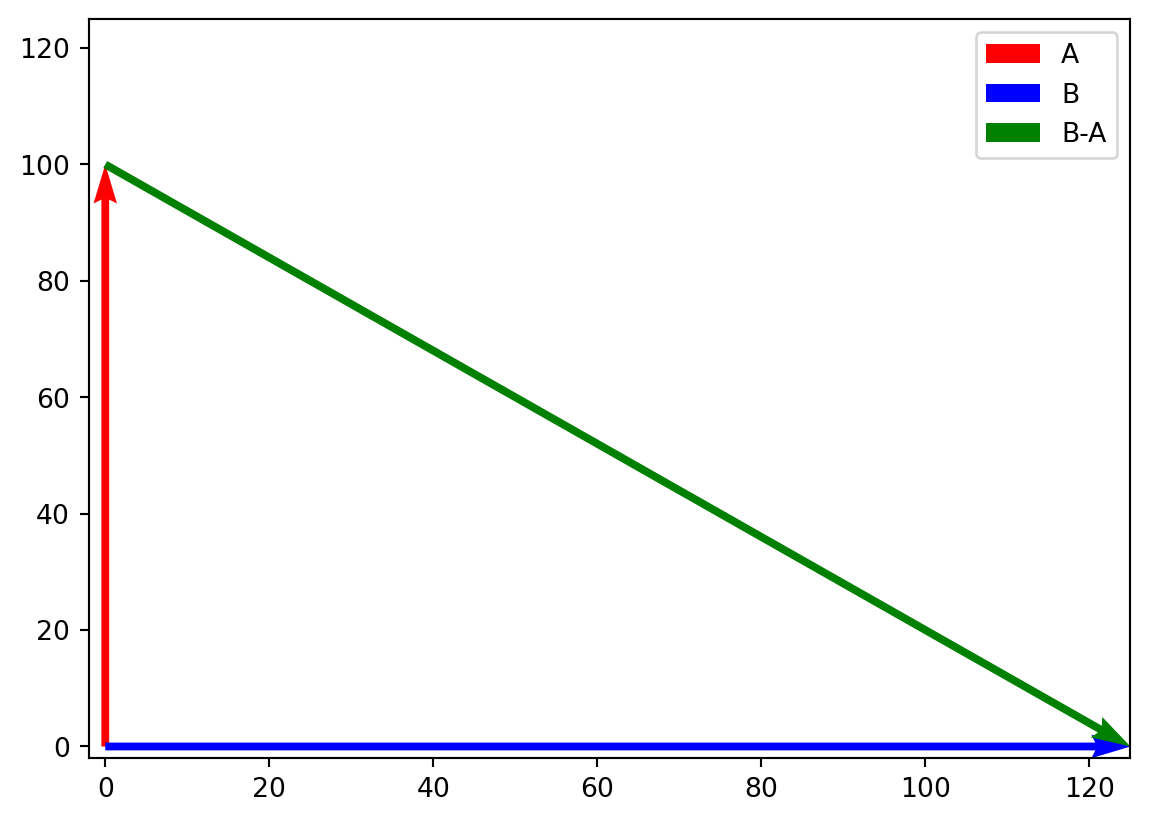

In [6]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt

A = np.array([0, 100])
B = np.array([125, 0])
C = B - A

# Create a figure
fig, ax = plt.subplots()

# Plot the vectors
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='B')
ax.quiver(A[0], A[1], C[0], C[1], angles='xy', scale_units='xy', scale=1, color='g', label='B-A')

# Set the limits of the plot
ax.set_xlim([-2, 125])
ax.set_ylim([-2, 125])

# Add a legend
ax.legend(loc=0)

Lasst und die Geraden für 5000, 10000 und 12000 Gewinn zeichnen. @fig-coffee-solution zeigt die zulässige Menge und die Geraden für 3000, 50000 und 12000 Gewinn.

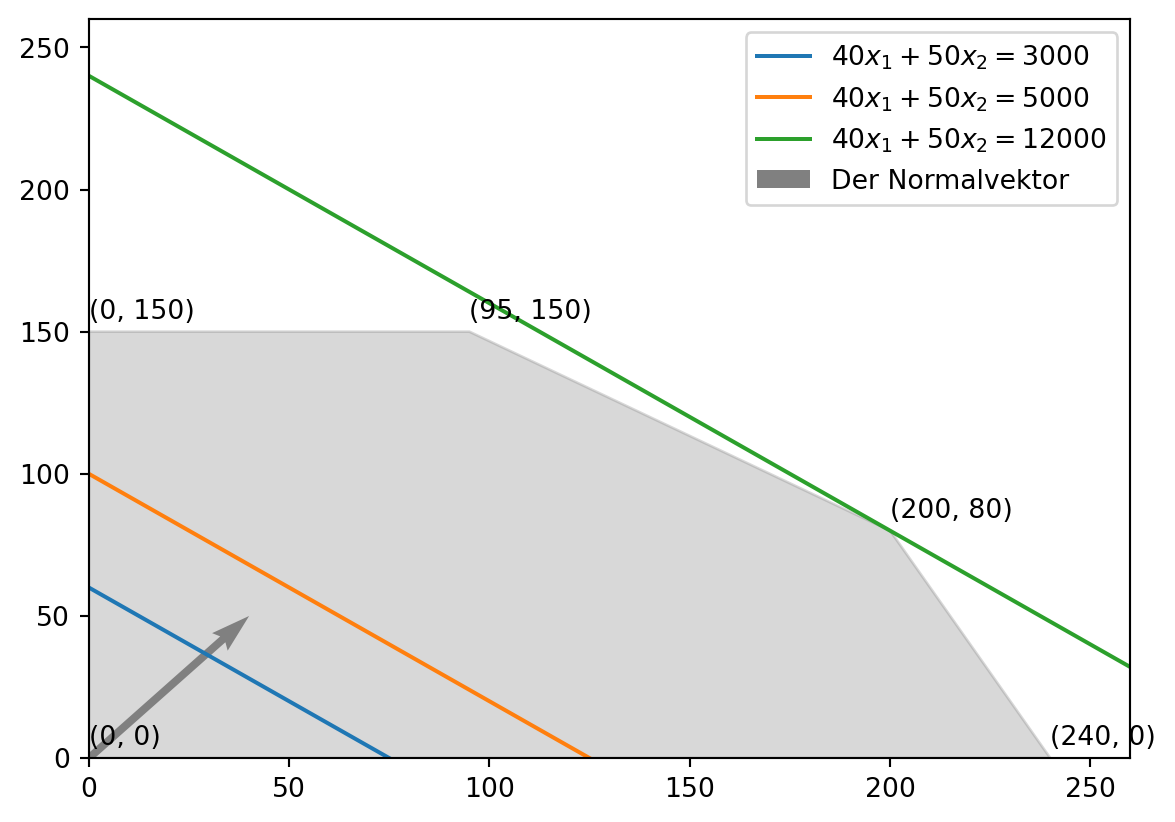

In [7]:
#| label: fig-coffee-solution
#| fig-cap: "Die graphische Lösung des Kaffeeproblems"
#| code-fold: true

fig, ax = plt.subplots()

ax.fill(vertices_x, vertices_y, color='grey', alpha=0.3)
for v in vertices:
    ax.annotate(
        f"({v[0]}, {v[1]})",
        (v[0], v[1]),
        textcoords="offset points",
        xytext=(0, 5)
    )

ax.plot([0, 3000 / 40], [3000 / 50, 0], label=r'$40 x_1 + 50 x_2 = 3000$')
ax.plot([0, 5000 / 40], [5000 / 50, 0], label=r'$40 x_1 + 50 x_2 = 5000$')
ax.plot([0, 12000 / 40], [12000 / 50, 0], label=r'$40 x_1 + 50 x_2 = 12000$')

ax.quiver(0, 0, 40, 50, angles='xy', scale_units='xy', scale=1, color='grey', label='Der Normalvektor')

ax.set_xlim((0, 260))
ax.set_ylim((0, 260))

ax.legend(loc=0)

Die Gerade, die die zulässige Menge gerade noch berührt ist diejenige, die den maximalen Gewinn darstellt. Der Schnittpunkt der Geraden für 12000 Gewinn mit der zulässigen Menge ist der optimale Plan. In dieser Aufgabe ist das der Punkt $(x^*_1 = 200, x^*_2 = 80)$ bei dem das Café 200 kg Super und 80 kg Deluxe kaufen sollte, um den maximalen Gewinn von 12000 € zu erzielen.

In dem optimalen Plan werden die ersten zwei Ressourcen vollständig ausgeschöpft, während die dritte Ressource nicht ausgeschöpft wird. Wie viel von der Nachfrage nach Deluxe bleibt unerfüllt? 

$$
0.5 \cdot 200 + 0.25 \cdot 80 = 120 \text{ kg Arabica}
$$

und

$$
0.5 \cdot 200 + 0.75 \cdot 80 = 160 \text{ kg Robusta}.
$$